In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(readxl)

In [4]:
library(tidyverse)
library(readxl)

cmv <- readxl::read_excel("data/cmv.xlsx")

cmv_tidy <- tidyr::pivot_longer(cmv,
                    donor_negative:donor_positive,
                    names_to = "donor_status",
                    values_to = "recipient_status"
                    )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



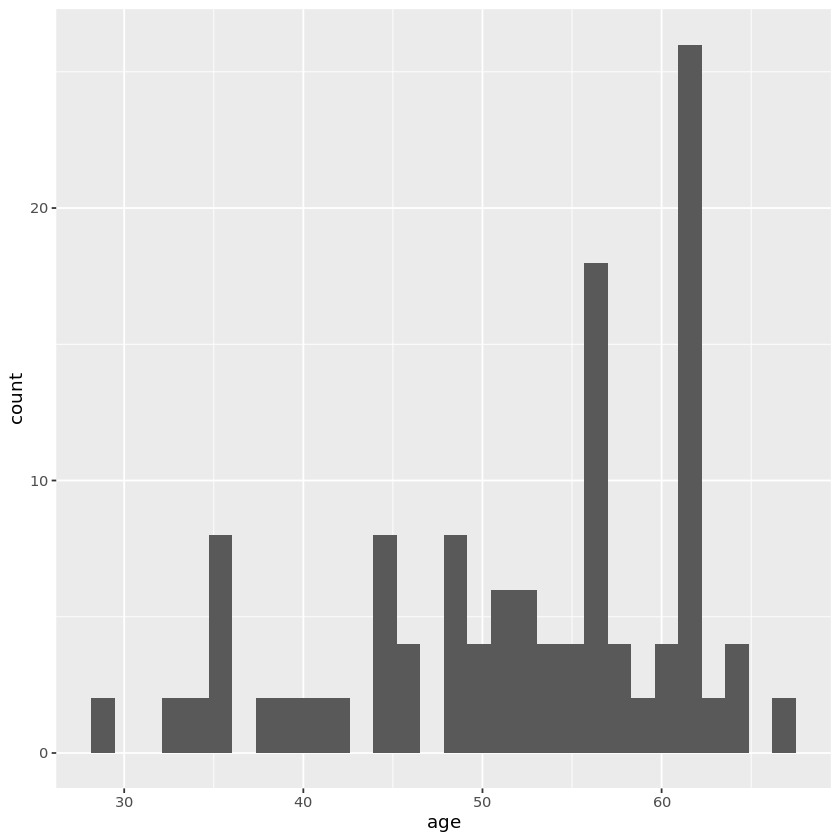

In [5]:
ggplot(cmv_tidy, aes(x = age)) + geom_histogram()

In [6]:
mod <- glm(cmv ~ age + prior.radiation + donor_status,
           data = cmv_tidy, family = "binomial")

In [7]:
summary(mod)


Call:
glm(formula = cmv ~ age + prior.radiation + donor_status, family = "binomial", 
    data = cmv_tidy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1074  -1.0688  -0.8244   1.2825   1.6348  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)
(Intercept)                -6.809e-01  1.186e+00  -0.574    0.566
age                         7.669e-03  2.133e-02   0.360    0.719
prior.radiation            -6.420e-01  5.553e-01  -1.156    0.248
donor_statusdonor_positive  2.015e-16  3.629e-01   0.000    1.000

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 172.92  on 127  degrees of freedom
Residual deviance: 170.74  on 124  degrees of freedom
AIC: 178.74

Number of Fisher Scoring iterations: 4
